In [45]:
import os
import shutil
import glob
import random

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from PIL import Image

import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [46]:
dataset_path = r'D:\ACM_AI\DL\datasets\fruits-360_100x100'

training_path = r"D:\ACM_AI\DL\datasets\fruits-360_100x100\fruits-360\Training"
test_path = r"D:\ACM_AI\DL\datasets\fruits-360_100x100\fruits-360\Test"

In [47]:
# Function to count the number of labels in a directory
def count_labels(path):
    label_count = 0
    # Walth through the directory tree and returns a touple (current path, directories inside, files inside)
    for _, dirs, _ in os.walk(path):
        # counts the number of directories in the current path
        label_count += len(dirs)
        break
    return label_count

num_labels = count_labels(training_path)
print(f"Number of labels(folders) in the training dataset: {num_labels}")

Number of labels(folders) in the training dataset: 82


In [48]:
labels = [label for label in os.listdir(training_path) if os.path.isdir(os.path.join(training_path, label))]

sorted_labels = sorted(labels)

print("Sorted Labels: ")
for label in sorted_labels:
    print(label)

Sorted Labels: 
Apple 6
Apple Braeburn 1
Apple Crimson Snow 1
Apple Golden 1
Apple Golden 2
Apple Golden 3
Apple Granny Smith 1
Apple Pink Lady 1
Apple Red 1
Apple Red 2
Apple Red 3
Apple Red Delicious 1
Apple Red Yellow 1
Apple Red Yellow 2
Apple hit 1
Apricot 1
Avocado 1
Avocado ripe 1
Banana 1
Banana Lady Finger 1
Banana Red 1
Beetroot 1
Blueberry 1
Cabbage white 1
Cactus fruit 1
Cantaloupe 1
Cantaloupe 2
Carambula 1
Carrot 1
Cauliflower 1
Cherry 1
Cherry 2
Cherry Rainier 1
Cherry Wax Black 1
Cherry Wax Red 1
Cherry Wax Yellow 1
Chestnut 1
Clementine 1
Cocos 1
Corn 1
Corn Husk 1
Cucumber 1
Cucumber 3
Cucumber Ripe 1
Cucumber Ripe 2
Dates 1
Eggplant 1
Eggplant long 1
Fig 1
Ginger Root 1
Granadilla 1
Grape Blue 1
Grape Pink 1
Grape White 1
Grape White 2
Grape White 3
Grape White 4
Grapefruit Pink 1
Grapefruit White 1
Guava 1
Hazelnut 1
Huckleberry 1
Kaki 1
Kiwi 1
Kohlrabi 1
Kumquats 1
Lemon 1
Lemon Meyer 1
Limes 1
Lychee 1
Mandarine 1
Mango 1
Mango Red 1
Mangostan 1
Maracuja 1
Melon P

In [49]:
def create_folders(destination_path):
    os.makedirs(destination_path, exist_ok=True)

    training_path = os.path.join(destination_path, "training")
    test_path = os.path.join(destination_path, "test")
    os.makedirs(training_path, exist_ok=True)
    os.makedirs(test_path, exist_ok=True)

destination_path = r"D:\ACM_AI\DL\datasets\filtered_fruits_dataset"
create_folders(destination_path)

print(f"filtered_dataset folder successfully in {destination_path}")
print(f"Training folder created successfully in {destination_path}")
print(f"Test folder created successfully in {destination_path}")
# Function to copy files from source to destination

filtered_dataset folder successfully in D:\ACM_AI\DL\datasets\filtered_fruits_dataset
Training folder created successfully in D:\ACM_AI\DL\datasets\filtered_fruits_dataset
Test folder created successfully in D:\ACM_AI\DL\datasets\filtered_fruits_dataset


In [50]:
def copy_selected_folders(source_path, destination_path, selected_fruits):
    # Checks if the source path exists
    if not os.path.exists(source_path):
        print("Source path does not exists")
        return
    
    # Reeds all the folders in the source path
    source_folders = os.listdir(source_path)
    for fruit_pattern in selected_fruits:
        fruit_pattern = fruit_pattern.lower()
        # Searches for the folder that start with the given fruit name
        fruit_folder_matches = [f for f in source_folders if f.lower().startswith(fruit_pattern)]

        #if no folder matches
        if not fruit_folder_matches:
            print(f"No variants found for '{fruit_pattern}'")
            continue

        # Constructs absolute paths for the source and destination folders
        for source_folder in fruit_folder_matches:
            fruit_name = source_folder
            source_folder = os.path.join(source_path, source_folder)
            destination_folder = os.path.join(destination_path, fruit_name)

            try:
                shutil.copytree(source_folder, destination_folder)
                print(f"Fruit '{fruit_name}' copied successfully in {destination_path}")
            
            except FileExistsError:
                print(f"Fruit '{fruit_name}' already exists in the destination path")

source_path = r"D:\ACM_AI\DL\datasets\fruits-360_100x100\fruits-360\Training"
destination_path = r"D:\ACM_AI\DL\datasets\filtered_fruits_dataset\training"

selected_fruits = ["Apple", "Banana", "Cherry", "Guava", "Grape", "Lychee", "Pineapple", "Rambutan", "Raspberry", "Redcurrant", "Salak"]

copy_selected_folders(source_path, destination_path, selected_fruits)

source_path = r"D:\ACM_AI\DL\datasets\fruits-360_100x100\fruits-360\Test"
destination_path = r"D:\ACM_AI\DL\datasets\filtered_fruits_dataset\test"
copy_selected_folders(source_path, destination_path, selected_fruits)

Fruit 'Apple 6' already exists in the destination path
Fruit 'Apple Braeburn 1' already exists in the destination path
Fruit 'Apple Crimson Snow 1' already exists in the destination path
Fruit 'Apple Golden 1' already exists in the destination path
Fruit 'Apple Golden 2' already exists in the destination path
Fruit 'Apple Golden 3' already exists in the destination path
Fruit 'Apple Granny Smith 1' already exists in the destination path
Fruit 'Apple hit 1' already exists in the destination path
Fruit 'Apple Pink Lady 1' already exists in the destination path
Fruit 'Apple Red 1' already exists in the destination path
Fruit 'Apple Red 2' already exists in the destination path
Fruit 'Apple Red 3' already exists in the destination path
Fruit 'Apple Red Delicious 1' already exists in the destination path
Fruit 'Apple Red Yellow 1' already exists in the destination path
Fruit 'Apple Red Yellow 2' already exists in the destination path
Fruit 'Banana 1' already exists in the destination path
F

In [51]:
training_subset = r"D:\ACM_AI\DL\datasets\filtered_fruits_dataset\training"
test_subset = r"D:\ACM_AI\DL\datasets\filtered_fruits_dataset\test"

def count_images_per_label(folder_path):
    label_counts = {
        label: len(os.listdir(os.path.join(folder_path, label)))
        for label in os.listdir(folder_path)
        if os.path.isdir(os.path.join(folder_path, label))
    }

    return label_counts

training_label_counts = count_images_per_label(training_subset)
test_label_counts = count_images_per_label(test_subset)
sorted_training_label_counts = sorted(training_label_counts.items(), key = lambda x: x[1], reverse = True)
sorted_test_label_counts = sorted(test_label_counts.items(), key = lambda x: x[1], reverse=True)
print("Training Label Counts (sorted by count):")
for label, count in sorted_training_label_counts:
    print(f"{label}: {count}")
print("\nTest Label Counts (sorted by count):")
for label,count in sorted_test_label_counts:
    print(f"{label}: {count}")

Training Label Counts (sorted by count):
Grape Blue 1: 984
Cherry 2: 738
Cherry Rainier 1: 738
Apple hit 1: 702
Apple Red Yellow 2: 672
Apple Braeburn 1: 492
Apple Golden 2: 492
Apple Granny Smith 1: 492
Apple Red 1: 492
Apple Red 2: 492
Apple Red Yellow 1: 492
Cherry 1: 492
Cherry Wax Black 1: 492
Cherry Wax Red 1: 492
Cherry Wax Yellow 1: 492
Grape Pink 1: 492
Grape White 3: 492
Grapefruit White 1: 492
Apple Red Delicious 1: 490
Banana 1: 490
Banana Red 1: 490
Grape White 1: 490
Grape White 2: 490
Grapefruit Pink 1: 490
Guava 1: 490
Lychee 1: 490
Apple Golden 3: 481
Apple Golden 1: 480
Apple 6: 473
Grape White 4: 471
Apple Pink Lady 1: 456
Banana Lady Finger 1: 450
Apple Crimson Snow 1: 444
Apple Red 3: 429

Test Label Counts (sorted by count):
Grape Blue 1: 328
Cherry 2: 246
Cherry Rainier 1: 246
Apple 19: 241
Apple 13: 235
Apple hit 1: 234
Apple 10: 231
Apple 9: 231
Apple worm 1: 231
Apple 7: 229
Apple 8: 228
Cherry Wax not rippen 1: 225
Apple Red Yellow 2: 219
Apple 17: 201
Apple 

In [52]:
def count_total_images(folder_path):
    total_images = 0
    for _, _, files in os.walk(folder_path):
        total_images += len(files)
    return total_images

total_images_count = count_total_images(dataset_path)
total_train_images_count = count_total_images(training_subset)
total_test_images_count = count_total_images(test_subset)

print(f"Total number of images in the dataset: {total_images_count}")
print(f"Total number of images in the training dataset: {total_train_images_count}")
print(f"Total number of images in the test dataset: {total_test_images_count}")

Total number of images in the dataset: 69508
Total number of images in the training dataset: 17834
Total number of images in the test dataset: 10075


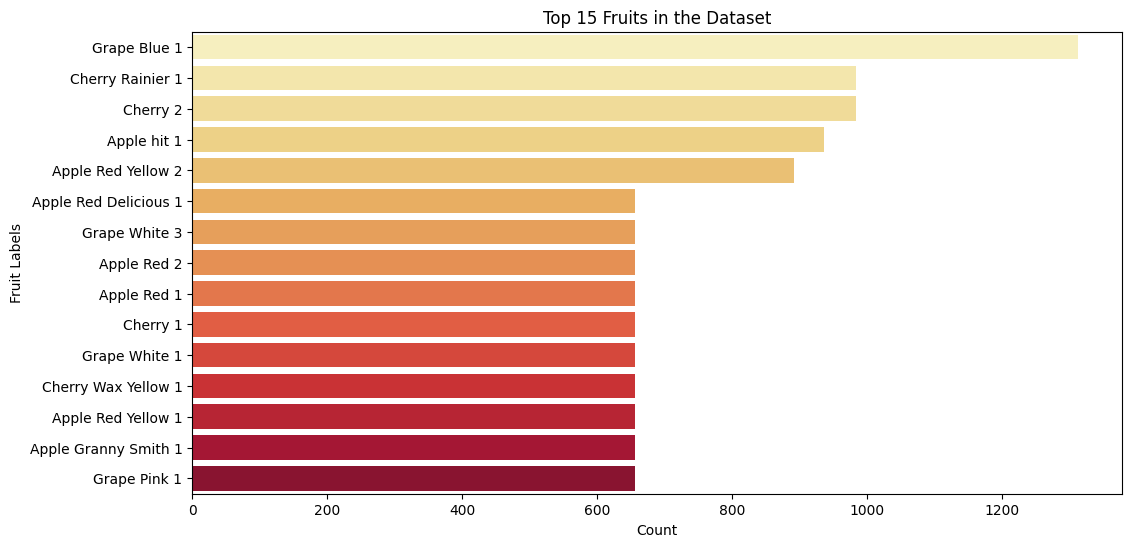

In [53]:
combined_label_counts = {
    label: training_label_counts.get(label, 0) + test_label_counts.get(label, 0)
    for label in set(list(training_label_counts.keys()) + list(test_label_counts.keys()))
}

df_fruit_counts = pd.DataFrame({"Fruit Labels" : list(combined_label_counts.keys()), "Count": list(combined_label_counts.values())})

df_fruit_counts = df_fruit_counts.sort_values(by="Count", ascending=False)

top_15_fruits = df_fruit_counts.head(15)

plt.figure(figsize=(12, 6))
sns.barplot(x = "Count", y = "Fruit Labels", data = top_15_fruits, palette="YlOrRd")
plt.title("Top 15 Fruits in the Dataset")
plt.xlabel("Count")
plt.ylabel("Fruit Labels")
plt.show()

In [54]:
BATCH_SIZE = 32
IMAGE_SIZE = 100
CHANNELS = 3
EPOCHS = 10

In [55]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    training_subset,
    seed = 42,
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 17834 files belonging to 34 classes.


In [56]:
tr_class_names = train_dataset.class_names
tr_class_names

['Apple 6',
 'Apple Braeburn 1',
 'Apple Crimson Snow 1',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Granny Smith 1',
 'Apple Pink Lady 1',
 'Apple Red 1',
 'Apple Red 2',
 'Apple Red 3',
 'Apple Red Delicious 1',
 'Apple Red Yellow 1',
 'Apple Red Yellow 2',
 'Apple hit 1',
 'Banana 1',
 'Banana Lady Finger 1',
 'Banana Red 1',
 'Cherry 1',
 'Cherry 2',
 'Cherry Rainier 1',
 'Cherry Wax Black 1',
 'Cherry Wax Red 1',
 'Cherry Wax Yellow 1',
 'Grape Blue 1',
 'Grape Pink 1',
 'Grape White 1',
 'Grape White 2',
 'Grape White 3',
 'Grape White 4',
 'Grapefruit Pink 1',
 'Grapefruit White 1',
 'Guava 1',
 'Lychee 1']

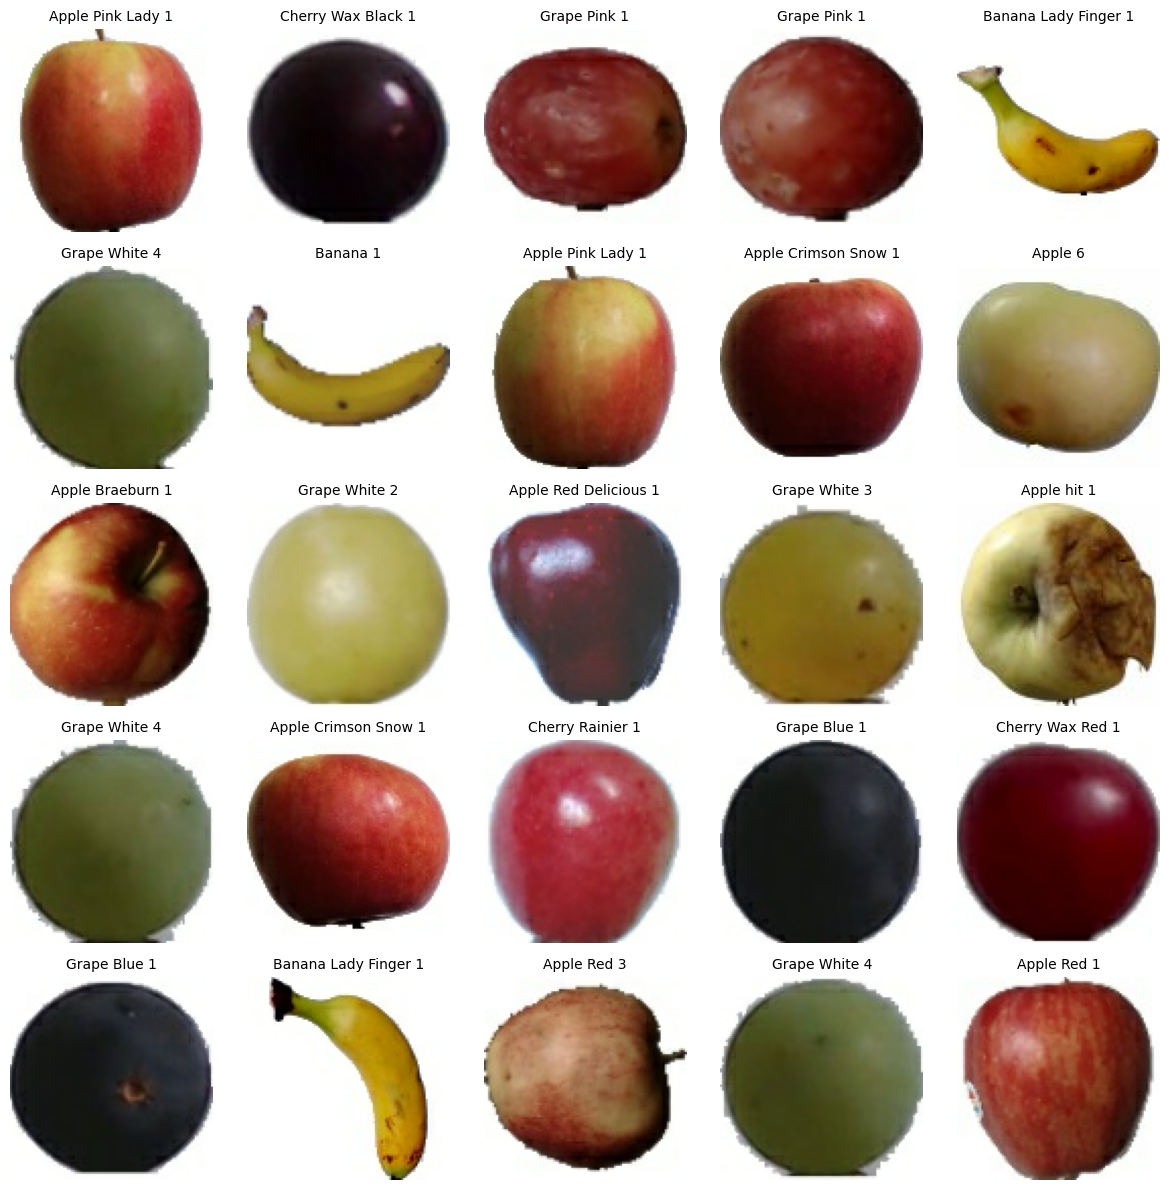

In [57]:
plt.figure(figsize=(12, 12))
for image_batch, labels_batch in train_dataset.take(9):
    for i in range(25):
        ax = plt.subplot(5, 5, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(tr_class_names[labels_batch[i]], fontsize=10)
        plt.axis("off")

plt.tight_layout()
plt.show()

In [58]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split = 0.2, shuffle = True, shuffle_size = 10000):
    assert (train_split + val_split) == 1
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=1234)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)

    return train_ds, val_ds

In [59]:
train_ds, val_ds = get_dataset_partitions_tf(train_dataset)

In [60]:
print("Training dataset length", len(train_ds))
print("Validation dataset length", len(val_ds))


Training dataset length 446
Validation dataset length 111


In [61]:
train_ds = train_ds.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)

In [62]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1. /255)
])

In [63]:
train_ds = train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)

In [64]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

n_classes = len(tr_class_names)
n_classes

34

In [66]:
model = Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape = input_shape)

In [67]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)       │ (32, 100, 100, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 98, 98, 32)       │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 49, 49, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 47, 47, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 23, 23, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 21, 21, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 10, 10, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (32, 8, 8, 128)        │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (32, 4, 4, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 2048)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 512)              │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (32, 512)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 34)               │        17,442 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,196,706 (4.57 MB)

 Trainable params: 1,196,706 (4.57 MB)

 Non-trainable params: 0 (0.00 B)

In [69]:
model.compile(
    optimizer = 'rmsprop',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [70]:
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = EPOCHS
)

Epoch 1/10
446/446 ━━━━━━━━━━━━━━━━━━━━ 50s 101ms/step - accuracy: 0.5456 - loss: 1.5818 - val_accuracy: 0.9783 - val_loss: 0.0483
Epoch 2/10
446/446 ━━━━━━━━━━━━━━━━━━━━ 42s 93ms/step - accuracy: 0.9685 - loss: 0.0997 - val_accuracy: 0.9992 - val_loss: 0.0040
Epoch 3/10
446/446 ━━━━━━━━━━━━━━━━━━━━ 45s 101ms/step - accuracy: 0.9882 - loss: 0.0447 - val_accuracy: 1.0000 - val_loss: 8.1912e-04
Epoch 4/10
446/446 ━━━━━━━━━━━━━━━━━━━━ 48s 108ms/step - accuracy: 0.9898 - loss: 0.0411 - val_accuracy: 0.9749 - val_loss: 0.1323
Epoch 5/10
446/446 ━━━━━━━━━━━━━━━━━━━━ 47s 106ms/step - accuracy: 0.9951 - loss: 0.0246 - val_accuracy: 0.9749 - val_loss: 0.1460
Epoch 6/10
446/446 ━━━━━━━━━━━━━━━━━━━━ 53s 118ms/step - accuracy: 0.9923 - loss: 0.0446 - val_accuracy: 1.0000 - val_loss: 6.5937e-04
Epoch 7/10
446/446 ━━━━━━━━━━━━━━━━━━━━ 50s 113ms/step - accuracy: 0.9973 - loss: 0.0162 - val_accuracy: 1.0000 - val_loss: 8.2818e-06
Epoch 8/10
446/446 ━━━━━━━━━━━━━━━━━━━━ 52s 116ms/step - accuracy: 0.997

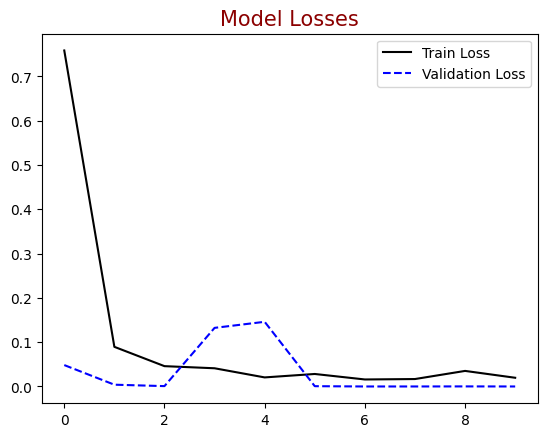

In [71]:
plt.figure()
plt.plot(history.history["loss"],label = "Train Loss", color='black')
plt.plot(history.history["val_loss"], label = "Validation Loss", color = "blue", linestyle="dashed")
plt.title("Model Losses", color="darkred", size=15)
plt.legend()
plt.show()

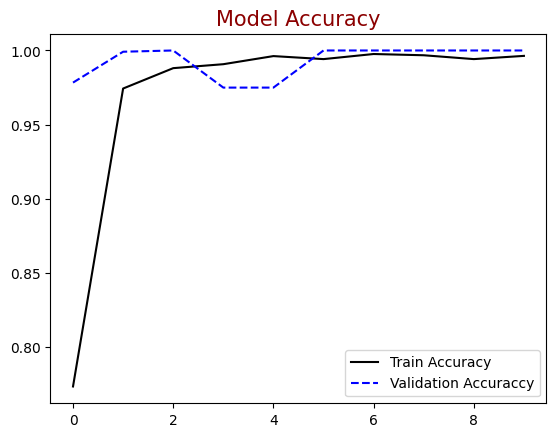

In [72]:
plt.figure()
plt.plot(history.history["accuracy"],label="Train Accuracy", color="black")
plt.plot(history.history["val_accuracy"], label="Validation Accuraccy", color="blue", linestyle="dashed")
plt.title("Model Accuracy", color = "darkred", size=15)
plt.legend()
plt.show()

In [73]:
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_subset,
    seed = 42,
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 10075 files belonging to 57 classes.


In [74]:
ts_class_names = test_dataset.class_names
ts_class_names

['Apple 10',
 'Apple 11',
 'Apple 12',
 'Apple 13',
 'Apple 14',
 'Apple 17',
 'Apple 18',
 'Apple 19',
 'Apple 5',
 'Apple 6',
 'Apple 7',
 'Apple 8',
 'Apple 9',
 'Apple Braeburn 1',
 'Apple Core 1',
 'Apple Crimson Snow 1',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Granny Smith 1',
 'Apple Pink Lady 1',
 'Apple Red 1',
 'Apple Red 2',
 'Apple Red 3',
 'Apple Red Delicious 1',
 'Apple Red Yellow 1',
 'Apple Red Yellow 2',
 'Apple Rotten 1',
 'Apple hit 1',
 'Apple worm 1',
 'Banana 1',
 'Banana 3',
 'Banana Lady Finger 1',
 'Banana Red 1',
 'Cherry 1',
 'Cherry 2',
 'Cherry Rainier 1',
 'Cherry Wax Black 1',
 'Cherry Wax Red 1',
 'Cherry Wax Yellow 1',
 'Cherry Wax not rippen 1',
 'Grape Blue 1',
 'Grape Pink 1',
 'Grape White 1',
 'Grape White 2',
 'Grape White 3',
 'Grape White 4',
 'Grapefruit Pink 1',
 'Grapefruit White 1',
 'Guava 1',
 'Lychee 1',
 'Pineapple 1',
 'Pineapple Mini 1',
 'Rambutan 1',
 'Raspberry 1',
 'Redcurrant 1',
 'Salak 1']

first image to predict
Actual label: Apple 19
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
Predicted label: Apple Core 1


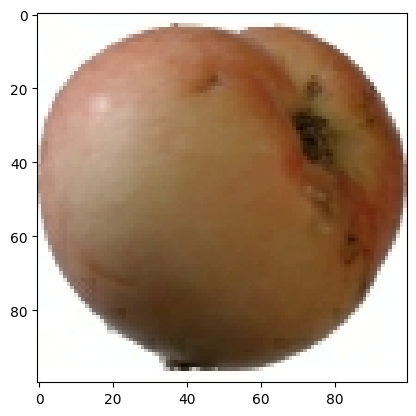

In [75]:
plt.figure()
for images_batch, laabels_batch in test_dataset.take(1):

    first_image = images_batch[0].numpy().astype("uint8")
    first_label = labels_batch[0].numpy()
    print("first image to predict")
    plt.imshow(first_image)
    print("Actual label:", ts_class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("Predicted label:", ts_class_names[np.argmax(batch_prediction[0])])

In [76]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = ts_class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━

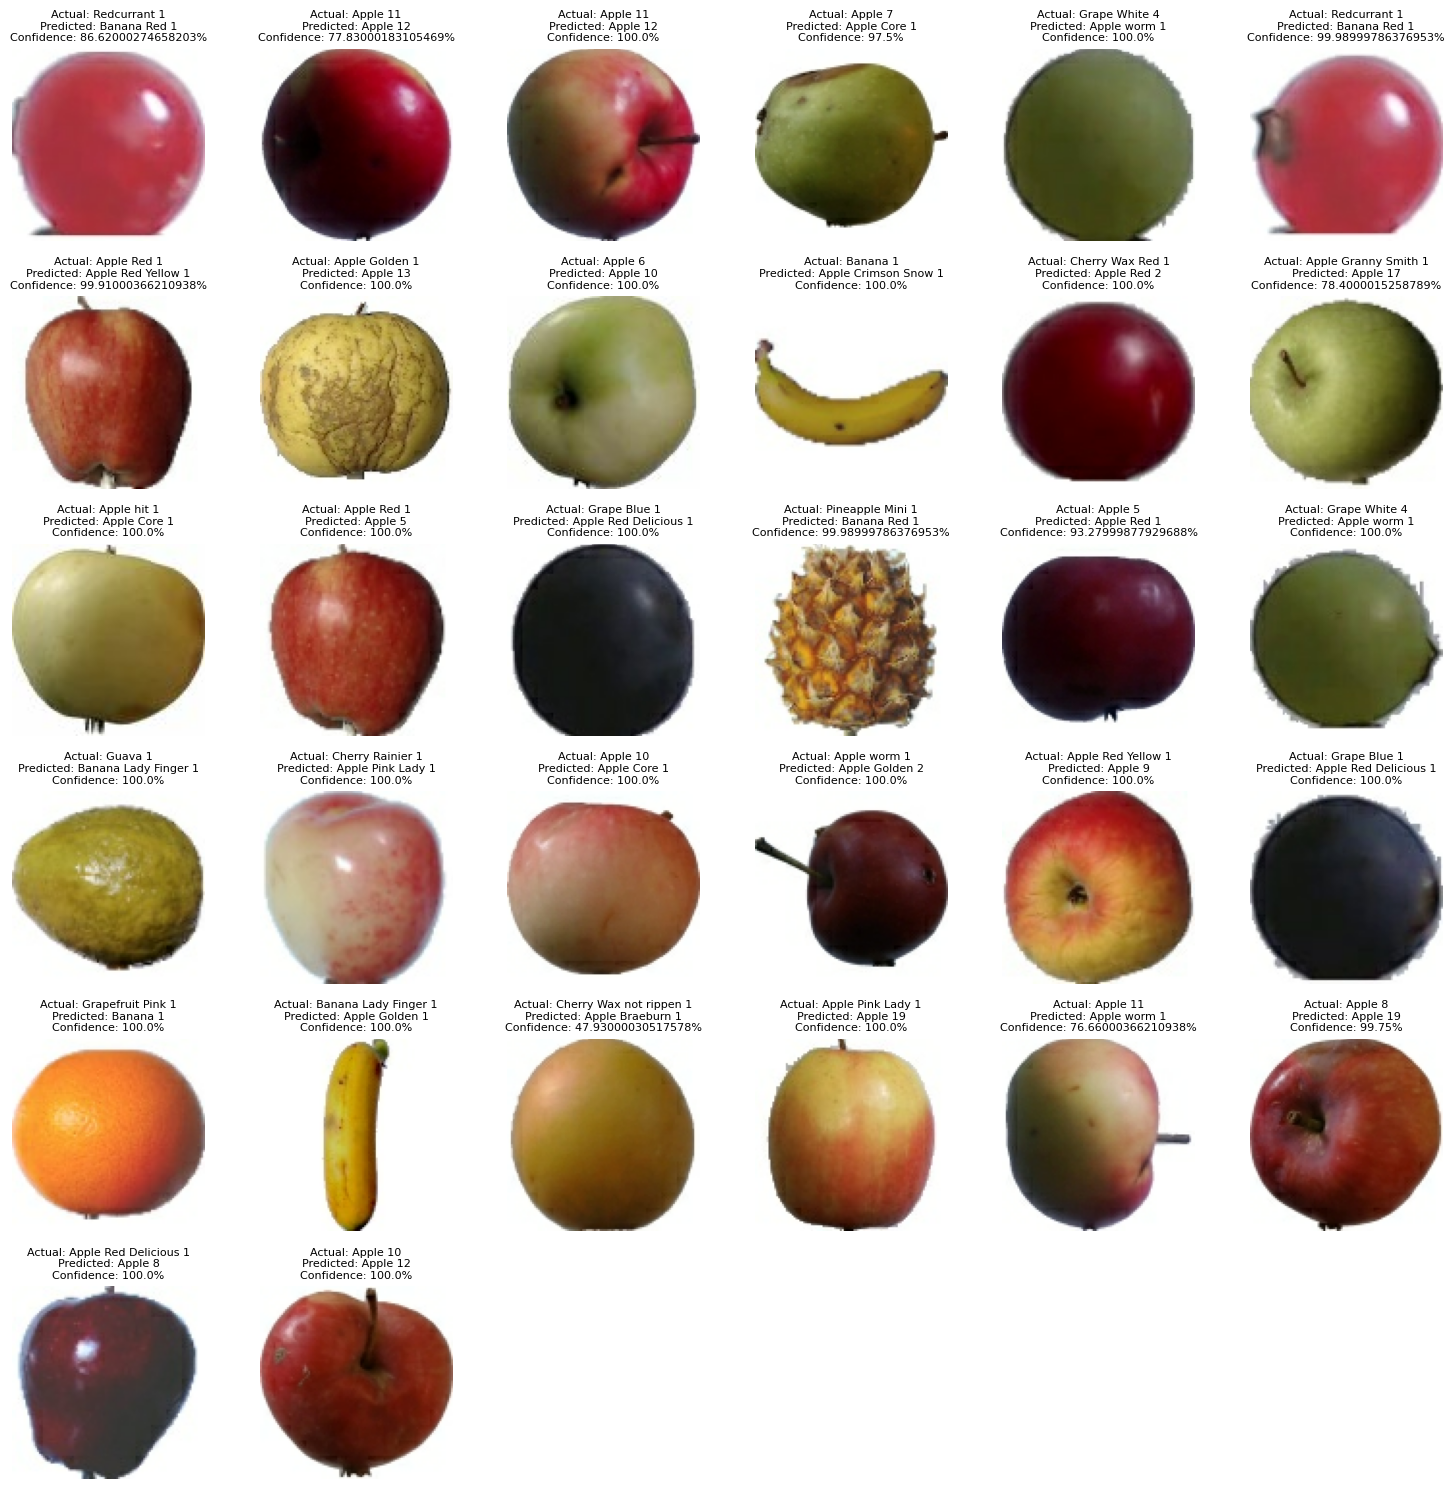

In [77]:
plt.figure(figsize=(15,15))

batch_size = 32
for images, labels in test_dataset.take(12):
    for i in range(batch_size):
        if i>=len(images):
            break

        ax = plt.subplot(6, 6, i+1)
        image = tf.image.resize(images[i], (100, 100))
        plt.imshow(image.numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = ts_class_names[labels[i]]
        plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence}%", fontsize = 8)
        plt.axis("off")

        if i >= batch_size - 1:
            break

for i in range(i + 1, batch_size):
    plt.subplot(6, 6, i + 1)
    plt.axis("off")

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━

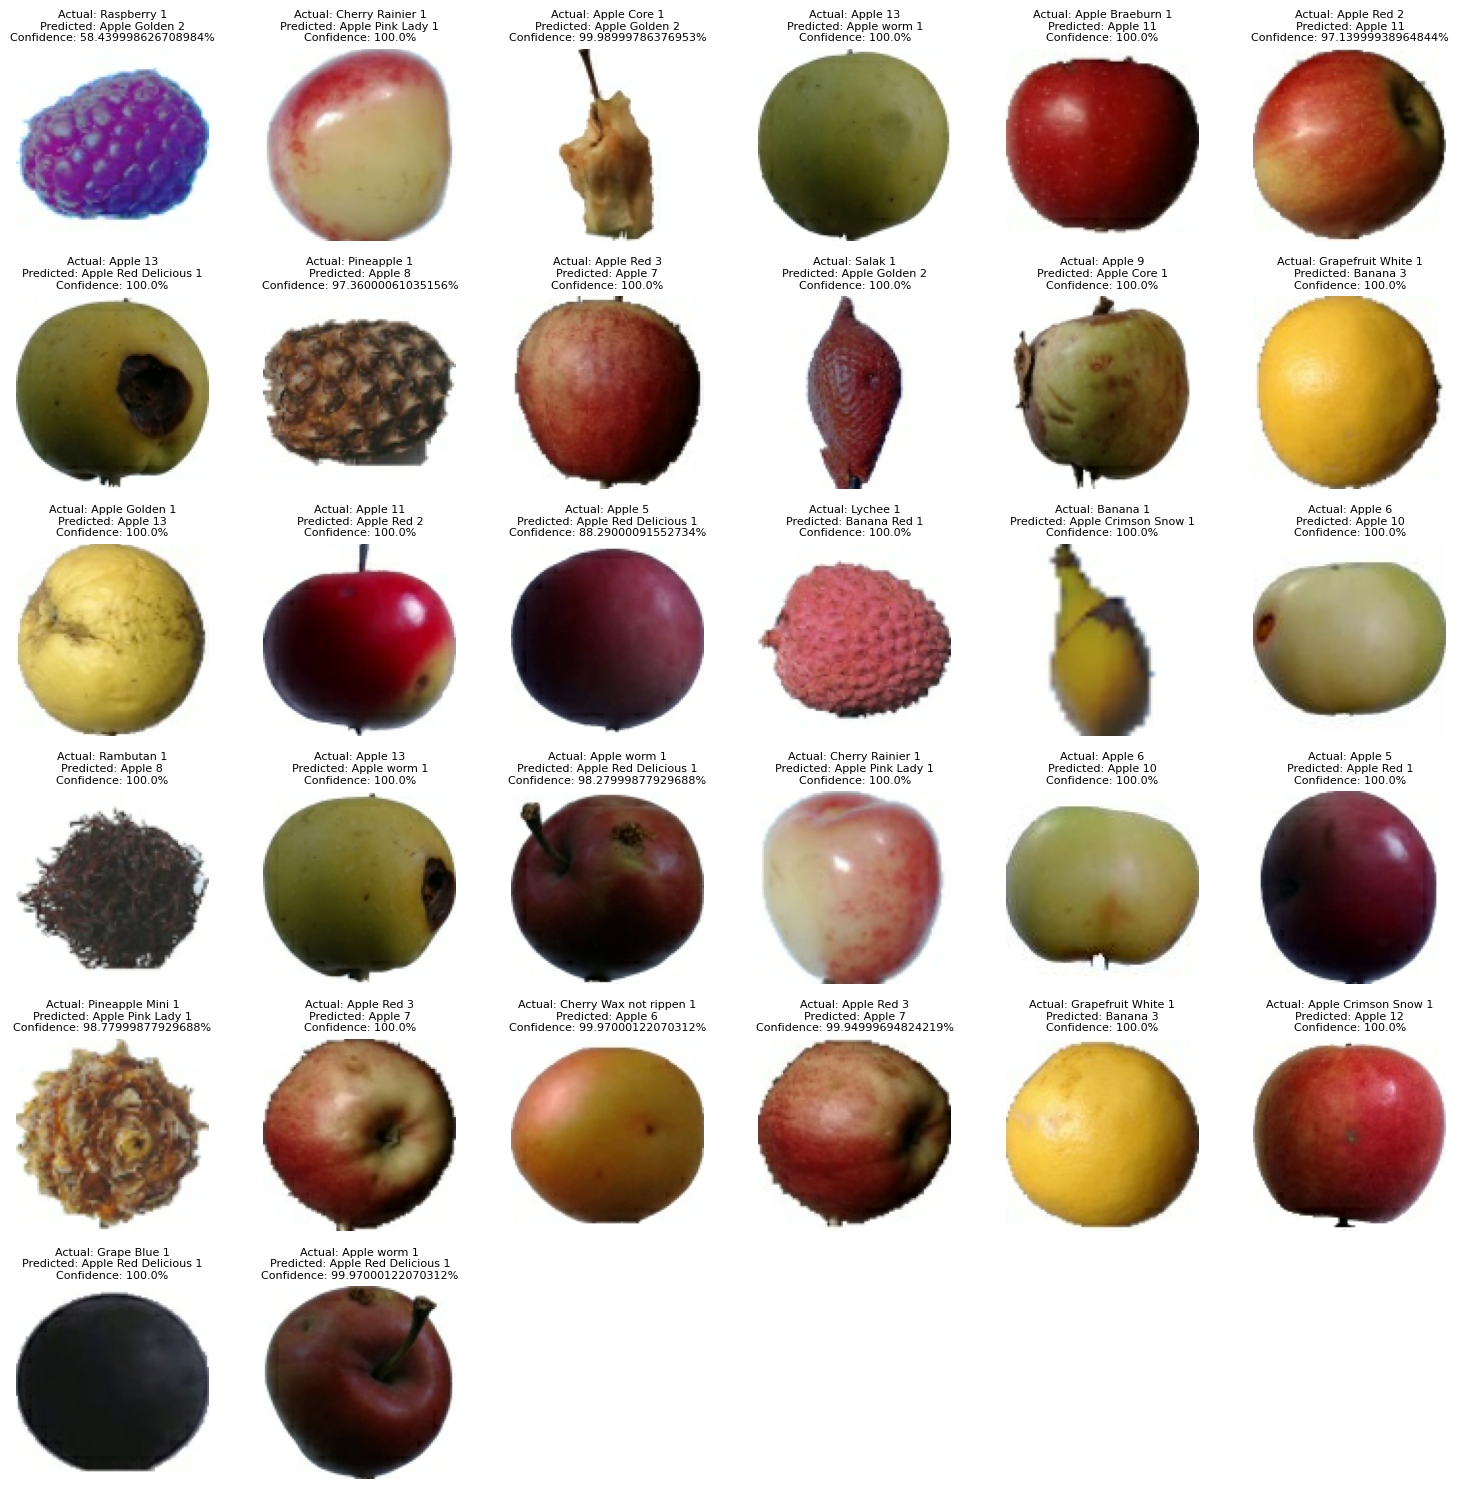

In [78]:
plt.figure(figsize=(15,15))

batch_size = 32
for images, labels in test_dataset.take(15):
    for i in range(batch_size):
        if i >= len(images):
            break

        ax = plt.subplot(6, 6, i + 1)
        image = tf.image.resize(images[i], (100, 100))
        plt.imshow(image.numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = ts_class_names[labels[i]]
        plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence}%", fontsize=8)
        plt.axis("off")

        if i >= batch_size - 1:
            break

for i in range(i + 1, batch_size):
    plt.subplot(6, 6, i + 1)
    plt.axis("off")

plt.tight_layout()
plt.show()